<a href="https://colab.research.google.com/github/ShirsaM/Kaggle_Applied_Projects-Data-Science/blob/main/Machine_Learning_prediction_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Species- prediction with ML Algorithms (Beginner level)

Hello Kagglers

This notebook deals with predicting species of IRIS flower using some of the basic and important ML algorithms like K-Nearest Neighbors, Decision Trees, Support Vector Machine and Logistic Regression. 

The methodologies followed will be as follows:-
1. Data Wrangling - clean the data of unecessary columns, drop or replace null entries, process data for analysis.
2. Exploratory Data Analysis(EDA) - analyse and visualize relationships between the different features of each of the species in the dataset.
3. Modeling & Prediction - use ML algorithms to create models for predicting unknown species and to find model with highest accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding the Dataset

Initially lets understand the number of rows & columns in the data and to find out which columns are not required for further analysis. Also to check for any null entries.

In [3]:
df.shape   #-------------> attribute to get the dimensions of the data

(150, 6)

In [4]:
df.isnull().sum()    #-------------> method to find null values in each column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### OR

In [5]:
df.info()    #-------------> method that shows count of null entries and number of rows & columns in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We observe that there are no null values. Now looking at the 6 columns, the 'Id' column can be dropped as it is unecessary. We use the drop() method for this. 

### Data Cleaning

In [6]:
df.drop('Id' , axis=1, inplace=True)        
# As we are dropping a column axis=1 is used and to make the changes on the dataframe set inplace as True.

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA - finding insights from data

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

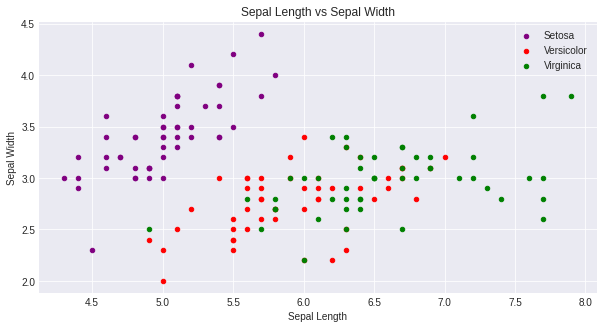

In [31]:
# To visualize Sepal Length vs Sepal Width for all three species

fig= df[df['Species']=='Iris-setosa'].plot(kind= 'scatter', x='SepalLengthCm', y='SepalWidthCm', 
                                           color='purple', label='Setosa')

df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm' , y='SepalWidthCm', 
                                          color='red', label='Versicolor', ax=fig)

df[df['Species']=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm' , y='SepalWidthCm', 
                                          color='green', label='Virginica', ax=fig)
plt.style.use('seaborn-darkgrid')
fig.set_title('Sepal Length vs Sepal Width')
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig = plt.gcf()
fig.set_size_inches(10,5)#--------------------> gcf() is get current figure
plt.show()

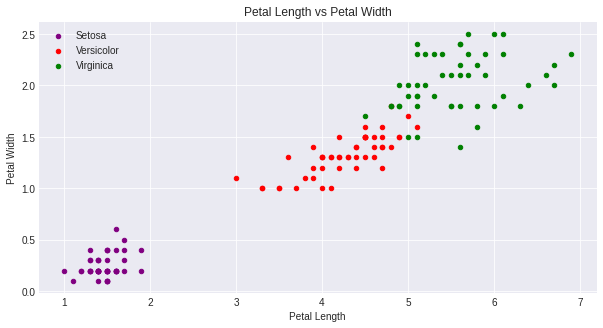

In [9]:
# To visualize Petal Length vs Petal Width for all three species

fig= df[df['Species']=='Iris-setosa'].plot(kind='scatter' , x='PetalLengthCm' , y='PetalWidthCm', 
                                          color='purple' , label='Setosa')

df[df['Species']=='Iris-versicolor'].plot(kind='scatter' , x='PetalLengthCm' , y='PetalWidthCm',
                                         color='red' , label='Versicolor' , ax=fig)

df[df['Species']=='Iris-virginica'].plot(kind='scatter' , x='PetalLengthCm' , y='PetalWidthCm',
                                         color='green' , label='Virginica' , ax=fig)
plt.style.use('seaborn-darkgrid')
fig.set_title('Petal Length vs Petal Width')
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

**Let's observe the distribution of sepal & petal length and width**

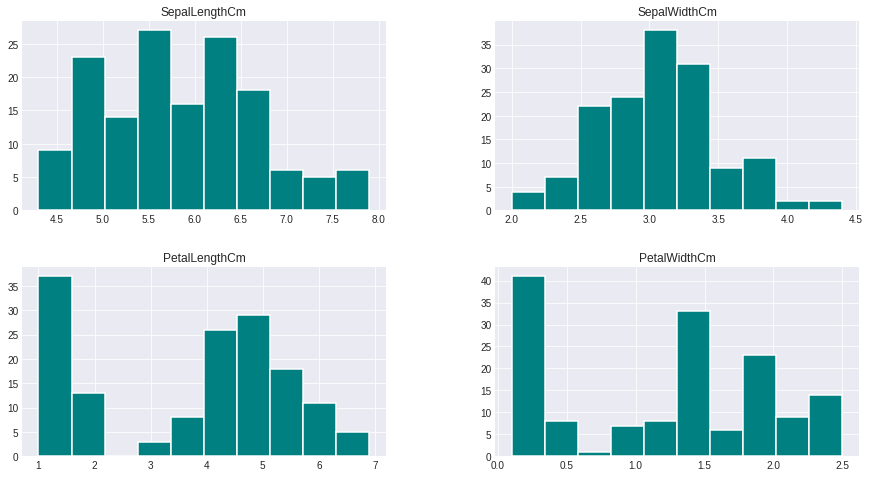

In [10]:
df.hist(color='teal' , edgecolor='white' , linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

**Now let's visualize the species wise distribution of sepal and petal length & witdth**

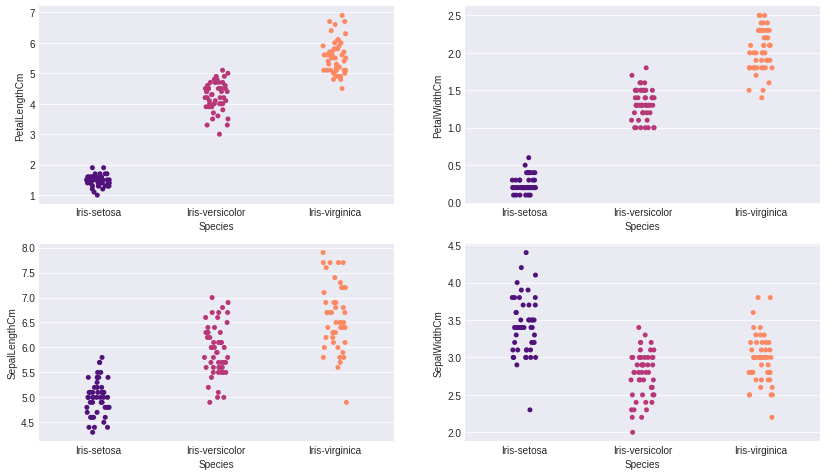

In [11]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.stripplot(x='Species' , y='PetalLengthCm', data=df, palette='magma')
plt.subplot(2,2,2)
sns.stripplot(x='Species' , y='PetalWidthCm', data=df, palette='magma')
plt.subplot(2,2,3)
sns.stripplot(x='Species' , y='SepalLengthCm', data=df, palette='magma')
plt.subplot(2,2,4)
sns.stripplot(x='Species' , y='SepalWidthCm', data=df, palette='magma')
plt.show()

 > **We can also use violinplot instead of stripplot to view a kernel density estimate. Just replace the strip with violin**

### Prediction using ML
**After the EDA now we will begin with ML modeling and with every model we have to check the accuracy**
Here we will use 4 algorithms:-

* K-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Logistic Regression

In [12]:
# First lets import relevant libraries

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

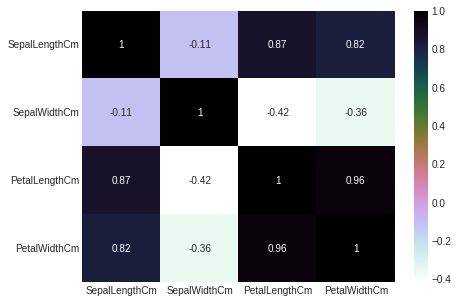

In [13]:
# Let's have a look at the correlation matrix to understand correlation between features

plt.figure(figsize=(7,5))
sns.heatmap(df.corr() , annot=True, cmap='cubehelix_r')
plt.show()

**We observe that the feautures Sepal length and Sepal width are not correlated whereas the Petal length & width are highly correlated**

> * To start with modeling, we first split the data into traindata and test data.
> * The train data is used to train the model
> * The test data is used to test the accuracy of the model created
> * We need to start with feature selection first

In [14]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df[['Species']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [16]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
28,5.2,3.4,1.4,0.2
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2


In [17]:
y_test.head()

,Species
6,Iris-setosa
3,Iris-setosa
113,Iris-virginica
12,Iris-setosa
24,Iris-setosa


In [18]:
KNN = KNeighborsClassifier(n_neighbors=4)     #--------------> define an object of algorithm   
KNN.fit(X_train , y_train)       #--------------> to fit/train the model
yhat = KNN.predict(X_test)       #--------------> store predicted value as yhat 
                                 #--------------> now to check the accuracy of the model
print('Accuracy of K Nearest Neighbors model is:- ', accuracy_score(yhat, y_test))
print('-------------------------------------------------')

Accuracy of K Nearest Neighbors model is:-  1.0
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
tree = DecisionTreeClassifier()     #--------------> define an object of algorithm   
tree.fit(X_train , y_train)       #--------------> to fit/train the model
yhat = tree.predict(X_test)       #--------------> store predicted value as yhat 
                                 #--------------> now to check the accuracy of the model
print('Accuracy of Decision Tree model is:- ', accuracy_score(yhat, y_test))
print('-------------------------------------------------')

Accuracy of Decision Tree model is:-  0.9555555555555556
-------------------------------------------------


In [20]:
svm = SVC()                        
svm.fit(X_train , y_train)        
yhat = svm.predict(X_test)        
                                  
print('Accuracy of SVM model is:- ', accuracy_score(yhat, y_test))
print('-------------------------------------------------')

Accuracy of SVM model is:-  0.9777777777777777
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
LR = LogisticRegression()        
LR.fit(X_train , y_train)        
yhat = LR.predict(X_test)        
                                
print('Accuracy of Logistic Regression model is:- ', accuracy_score(yhat, y_test))
print('-------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression model is:-  0.9777777777777777
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Let's check the accuracy for various values of n for K-Nearest nerighbours**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

([<matplotlib.axis.XTick at 0x7f5027a77a50>,
 <a list of 10 Text major ticklabel objects>)

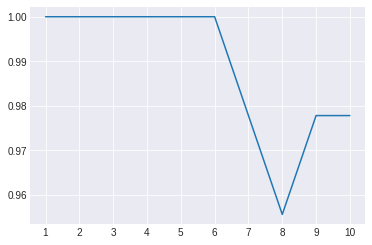

In [22]:
index= list(range(1,11))
s = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]

for i in index:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    s= s.append(pd.Series(accuracy_score(yhat , y_test)))
    
plt.plot(index,s)
plt.xticks(x)

**From above plot we see that KNN model has best accuracy for n=1 to 7, and for n=8 the accuracy drops considerably**

Now lets create Petals and Sepals data from df and predict seperately

In [23]:
petals = df[['PetalLengthCm','PetalWidthCm','Species']]
sepals = df[['SepalLengthCm','SepalWidthCm','Species']]

In [24]:
Xp = petals[['PetalLengthCm','PetalWidthCm']]
yp = petals[['Species']]

Xs = sepals[['SepalLengthCm','SepalWidthCm']]
ys = sepals[['Species']]

In [25]:
Xp_train , Xp_test , yp_train , yp_test = train_test_split(Xp, yp , test_size=0.3, random_state=4)

print(Xp_train.shape)
print(yp_test.shape)
print(Xp_test.shape)
print(yp_train.shape)

(105, 2)
(45, 1)
(45, 2)
(105, 1)


In [26]:
Xs_train , Xs_test , ys_train , ys_test = train_test_split(Xs , ys , test_size=0.3 , random_state=4)

In [27]:
# K nearest neighbors

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xp_train , yp_train)
yhat = knn.predict(Xp_test)
print('Accuracy score of K nearest neighbors using petals data:- ', accuracy_score(yhat, yp_test))

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xs_train , ys_train)
yhat= knn.predict(Xs_test)
print('Accuracy score of K nearest neighbors using sepals data:- ', accuracy_score(yhat, ys_test))
print('-------------------------------------------------------------')

Accuracy score of K nearest neighbors using petals data:-  0.9777777777777777
Accuracy score of K nearest neighbors using sepals data:-  0.8
-------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
# Decision Trees

tree = DecisionTreeClassifier()
tree.fit(Xp_train , yp_train)
yhat = tree.predict(Xp_test)
print('Accuracy score of Decision Trees using petals data:- ', accuracy_score(yhat, yp_test))

tree= DecisionTreeClassifier()
tree.fit(Xs_train , ys_train)
yhat=tree.predict(Xs_test)
print('Accuracy score of Decision Trees using sepals data:- ', accuracy_score(yhat, ys_test))
print('------------------------------------------------------------')

Accuracy score of Decision Trees using petals data:-  0.9777777777777777
Accuracy score of Decision Trees using sepals data:-  0.8
------------------------------------------------------------


In [29]:
# SVM

svm = SVC()
svm.fit(Xp_train , yp_train)
yhat = svm.predict(Xp_test)
print('Accuracy score of SVM using petals data:- ', accuracy_score(yhat, yp_test))

svm=SVC()
svm.fit(Xs_train , ys_train)
yhat=svm.predict(Xs_test)
print('Accuracy score of SVM using sepals data:- ', accuracy_score(yhat, ys_test))
print('-------------------------------------------------')

Accuracy score of SVM using petals data:-  0.9777777777777777
Accuracy score of SVM using sepals data:-  0.8666666666666667
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(Xp_train , yp_train)
yhat = lr.predict(Xp_test)
print('Accuracy score of Logistic Regression using petals data:- ', accuracy_score(yhat, yp_test))

lr= LogisticRegression()
lr.fit(Xs_train , ys_train)
yhat=lr.predict(Xs_test)
print('Accuracy score of Logistic Regression using sepals data:- ', accuracy_score(yhat, ys_test))
print('-------------------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of Logistic Regression using petals data:-  0.9777777777777777
Accuracy score of Logistic Regression using sepals data:-  0.8444444444444444
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Our observations are:-

* Petals data gives a greater accuracy as compared to Sepals data
* Above observation was likely as was observed from the earlier heatmap of correlation matrix
* Out of the 4 models, KNN model has highest accuracy on both whole data and Petals-Sepals data

Hope this notebook helps!!